# Getting Started

This tutorial shows some examples of how to use `sen2nbar`. We start with the simplest: computing NBAR directly for `cubo`:

In [1]:
import cubo
from sen2nbar.nbar import nbar_cubo

Create a mini cube with an edge size of 32 pixels and a resolution of 10 m from the Sentinel-2 L2A Collection of Planetary Computer given a pair of coordinates and start and end dates using just the RGB bands:

In [2]:
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection="sentinel-2-l2a",
    bands=["B02","B03","B04"],
    start_date="2020-01-01",
    end_date="2021-01-01",
    edge_size=64,
    resolution=10,
    query={"eo:cloud_cover": {"lt": 40}}
)
da

,Array,Chunk
Bytes,4.31 MiB,32.00 kiB
Shape,"(46, 3, 64, 64)","(1, 1, 64, 64)"
Count,414 Tasks,138 Chunks
Type,float64,numpy.ndarray


Note that we are using just the RGB bands. When computing NBAR, just these bands will be used. But you can use all the available bands in Sentinel-2 (Remember that B01 and B8A are not supported for NBAR!).

Now, computing NBAR for `cubo` is as easy as follows:

In [ ]:
da = nbar_cubo(da, quiet=True)

Now, let's visualize our NBAR cube:

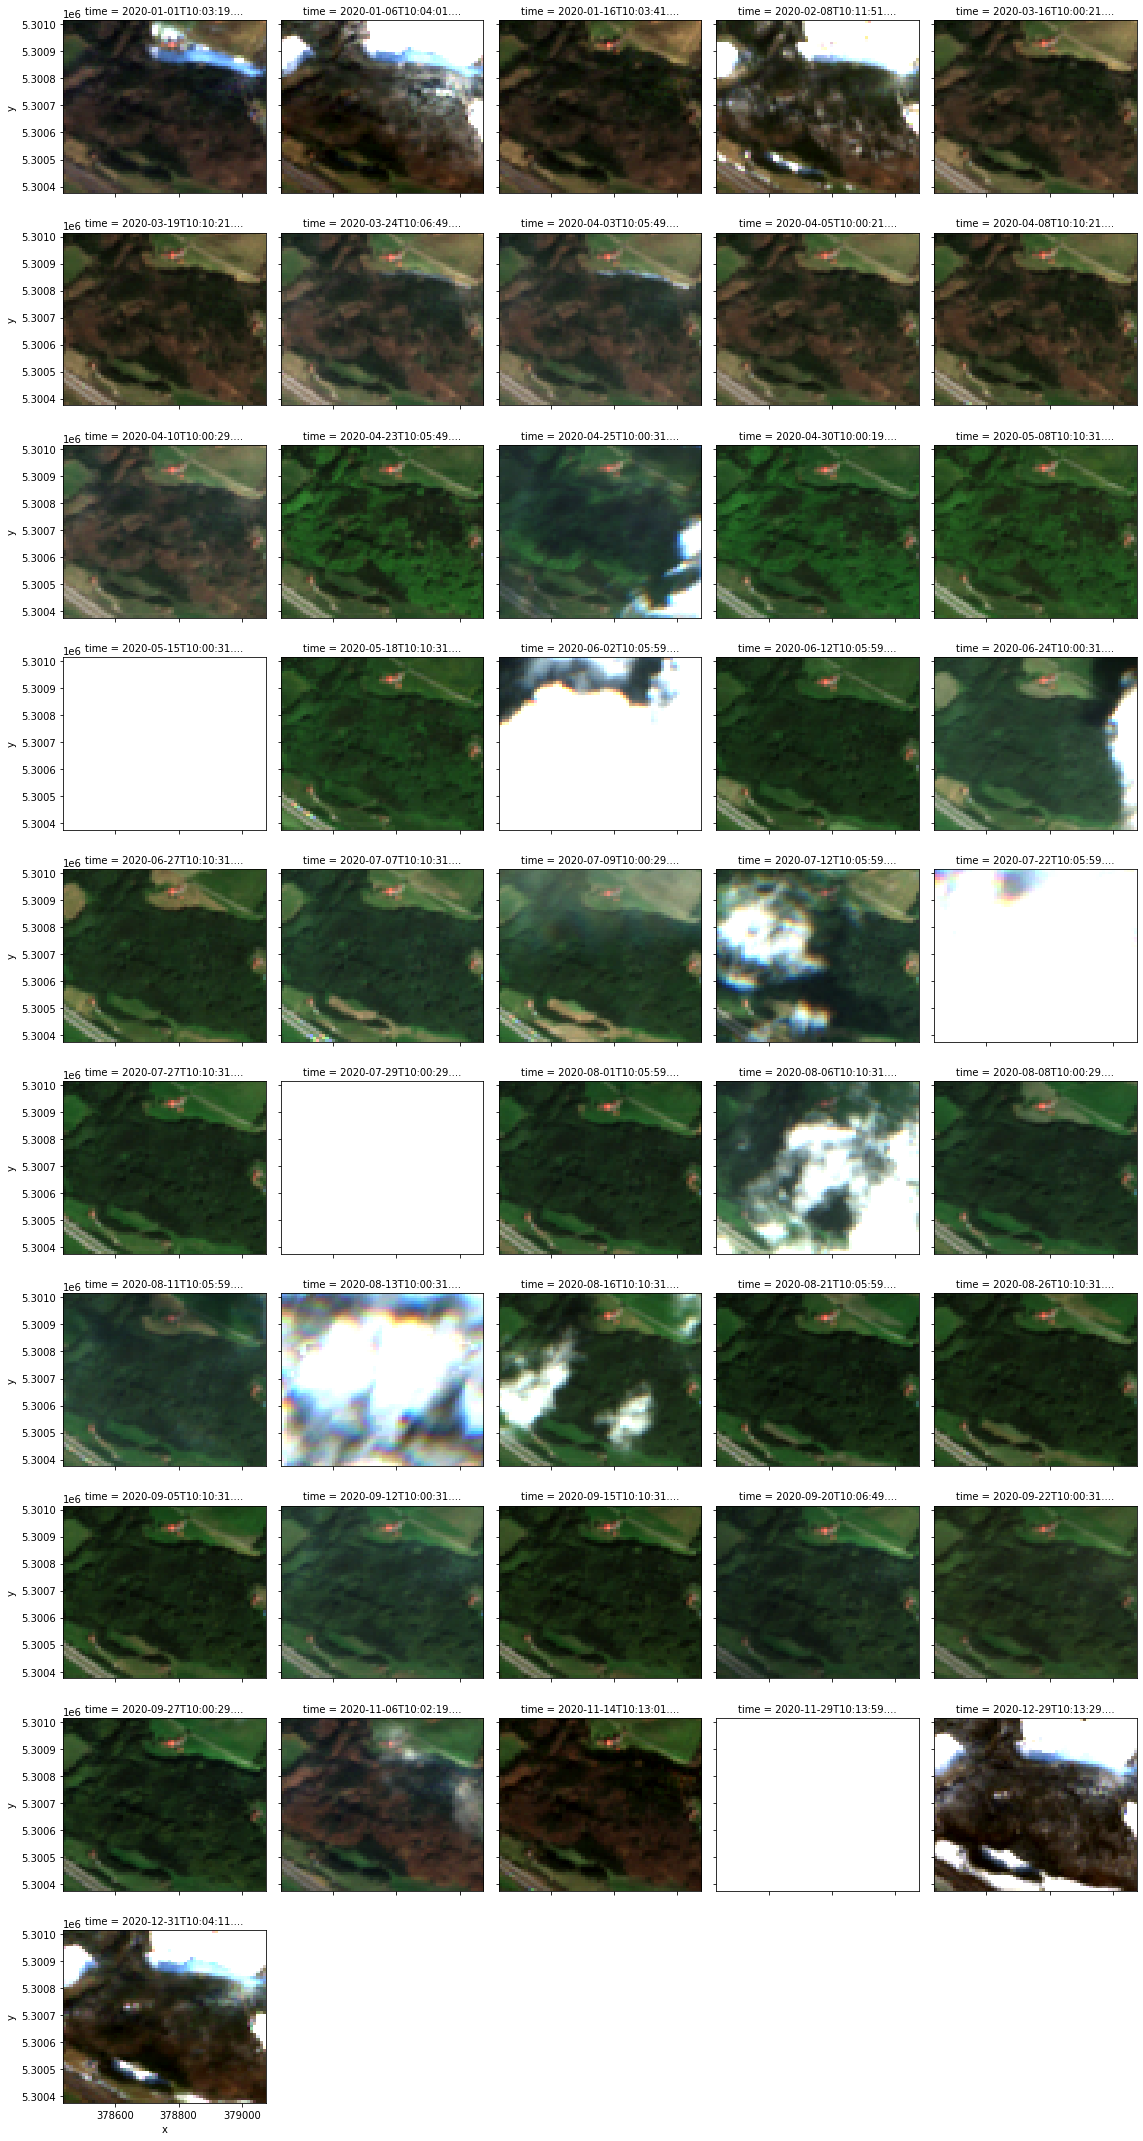

In [4]:
(da.sel(band=["B04","B03","B02"])/2000).clip(0,1).plot.imshow(col="time",col_wrap = 5)